Let's find out various observations for the titanic data set we have here.

In [1]:
#getting the required libreries
import pandas as pd
from io import StringIO 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#getting the titanic data set with some rows
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(titanic.shape)
titanic.info()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


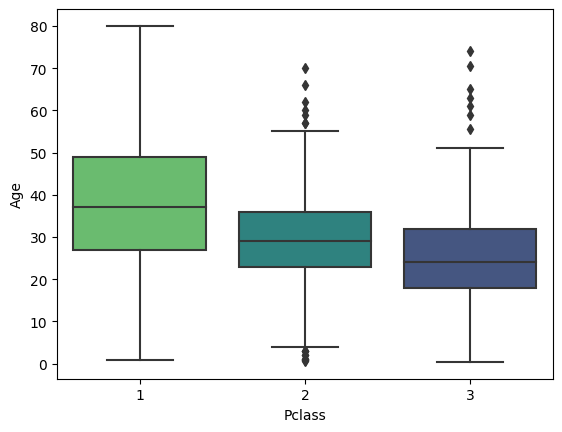

In [5]:
dataLabels = sns.boxplot(y='Age',x='Pclass',data=titanic,palette='viridis_r')
medians = titanic.groupby(['Pclass'])['Age'].median()
def replaceNullAge(cols):
    age = cols[0]
    pclass= cols[1]
    medians = titanic.groupby(['Pclass'])['Age'].median()
    if pd.isnull(age):
        if pclass == 1:
            return medians.iloc[0]
        elif pclass==2:
            return medians.iloc[1]
        else:
            return medians.iloc[2]
    else:
        return age

['S' 'C' 'Q' nan]
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Q              0
S              0
dtype: int64


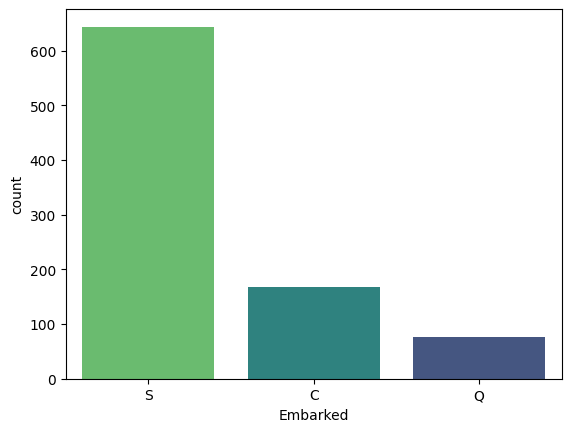

In [6]:
titanic['Age'] = titanic[['Age','Pclass']].apply(replaceNullAge,axis=1)
#one hot encoding technique
print(titanic['Embarked'].unique()) 
# sex_1 = pd.get_dummies(titanic['Sex'],drop_first=True)
dataLabels = sns.countplot(x='Embarked',data=titanic,palette='viridis_r')
embarked_1=pd.get_dummies(titanic['Embarked'],drop_first=True)
titanic.drop(['Embarked','Ticket','Cabin'],axis=1,inplace=True) # drop unnecessary columns 
titanic = pd.concat([titanic,embarked_1],axis=1) # concate encoded column embarked_1
print(titanic.isnull().sum())

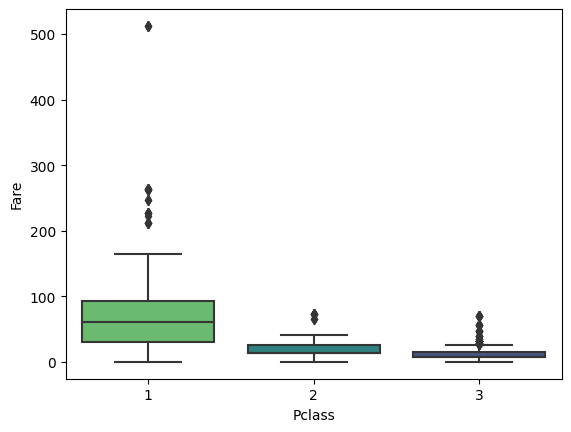

In [9]:
fareBox = sns.boxplot(y='Fare',x='Pclass',data=titanic,palette='viridis_r')
def replaceZeroFare(col):
    fare = col[0] 
    if fare == 0:
        return titanic['Fare'].median()
    else:
        return fare
zeroFareCount = titanic.loc[(titanic['Fare'] == 0)].count()
if zeroFareCount['Fare'] > 0:
    titanic['Fare'] = titanic[['Fare']].apply(replaceZeroFare,axis=1)
else:
    print("Zero Fare Rows Count:",zeroFareCount['Fare'])

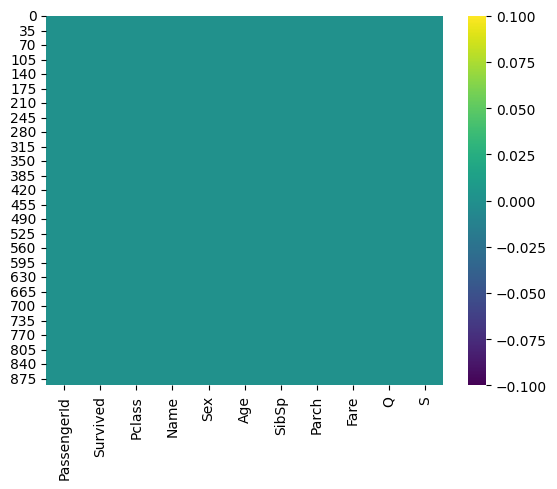

In [10]:
sns.heatmap(titanic.isnull(),cmap='viridis')
plt.show()

In [11]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.066409,0.523008,0.381594,32.447545,0.086420,0.722783
std,257.353842,0.486592,0.836071,13.244532,1.102743,0.806057,49.570235,0.281141,0.447876
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,4.012500,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


In [12]:
tdf = titanic.copy()
youngest = tdf.loc[tdf['Age'] == min(tdf['Age'])]
print(youngest[['Name','Age','Pclass','Q','S','Survived','SibSp','Parch','Fare']].to_string(index=False))
oldest = tdf.loc[tdf['Age'] == max(tdf['Age'])]                               
print(oldest[['Name','Age','Pclass','Q','S','Survived','SibSp','Parch','Fare']].to_string(index=False))

                           Name  Age  Pclass  Q  S  Survived  SibSp  Parch   Fare
Thomas, Master. Assad Alexander 0.42       3  0  0         1      0      1 8.5167
                                Name  Age  Pclass  Q  S  Survived  SibSp  Parch  Fare
Barkworth, Mr. Algernon Henry Wilson 80.0       1  0  1         1      0      0  30.0


Passenger Names with Age between 30 and 60:
                                     Name   Age
7          Palsson, Master. Gosta Leonard   2.0
9     Nasser, Mrs. Nicholas (Adele Achem)  14.0
10        Sandstrom, Miss. Marguerite Rut   4.0
12         Saundercock, Mr. William Henry  20.0
14   Vestrom, Miss. Hulda Amanda Adolfina  14.0
..                                    ...   ...
869       Johnson, Master. Harold Theodor   4.0
875      Najib, Miss. Adele Kiamie "Jane"  15.0
876         Gustafsson, Mr. Alfred Ossian  20.0
877                  Petroff, Mr. Nedelio  19.0
887          Graham, Miss. Margaret Edith  19.0

[179 rows x 2 columns]


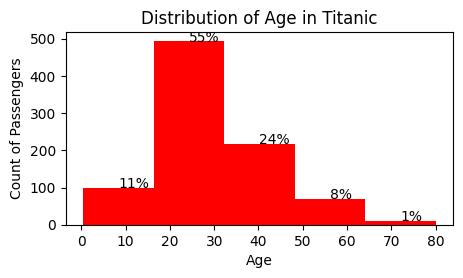

In [13]:
#2. between 30 to 60 age with passenger name
DfAge = tdf.loc[(tdf['Age'] >= 0) & (tdf['Age'] <= 20)]
print("Passenger Names with Age between 30 and 60:")
print(DfAge[['Name','Age']])
axAge = tdf['Age'].plot.hist(x='Age', rot=0,bins=5, color="red",figsize=(5,2.5))
axAge.set_title("Distribution of Age in Titanic")
axAge.set_xlabel("Age")
axAge.set_ylabel("Count of Passengers")
total = tdf['Age'].count()
for p in axAge.patches:
    h = p.get_height()
    w = p.get_width()
    x = p.get_x()
    y = p.get_y()
    axAge.annotate(str(round((h*100)/total))+"%",xy=(x + w/2,h))

In [14]:
#3. Find out how many survived and not survived
number = tdf['Survived'].value_counts()
print("Number of Survived Passengers:",number[1])
print("Number of Not Survived(Dead) Passengers:",number[0])

Number of Survived Passengers: 342
Number of Not Survived(Dead) Passengers: 549


In [ ]:
#4. Find out how many males and females have travelled
number = tdf['Sex'].value_counts()
print("Number of Male Passengers:",number[0])
print("Number of Female Passengers:",number[1])

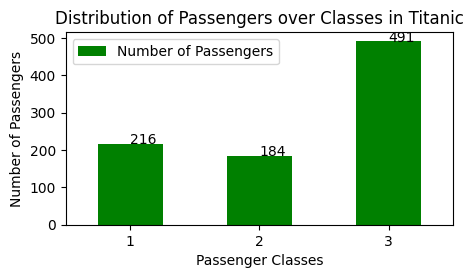

In [15]:
#1. bar chart of Passenger class
pclass = tdf['Pclass'].value_counts().sort_index()
df = pd.DataFrame({'Passenger Class':pclass.index, 'Number of Passengers':pclass.values})
ax = df.plot.bar(x='Passenger Class', rot=0, color="green",figsize=(5,2.5))
ax.set_title("Distribution of Passengers over Classes in Titanic")
ax.set_xlabel("Passenger Classes")
ax.set_ylabel("Number of Passengers")
for p in ax.patches:
    h = p.get_height()
    w = p.get_width()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(h,xy=(x + w/2,h))

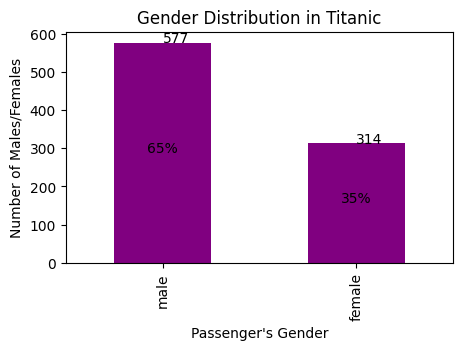

In [16]:
#2. Gender Column bar chart
gender = tdf['Sex'].value_counts()
total = gender.sum()
ax = gender.plot.bar('Sex',color='purple',figsize=(5,3))
ax.set_title("Gender Distribution in Titanic")
ax.set_xlabel("Passenger's Gender")
ax.set_ylabel("Number of Males/Females")
for p in ax.patches:
    h = p.get_height()
    w = p.get_width()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(h,xy=(x + w/2,h))
    ax.annotate(str(round((h*100)/total)) + "%",xy=(x+w/2,y+h/2),ha='center')

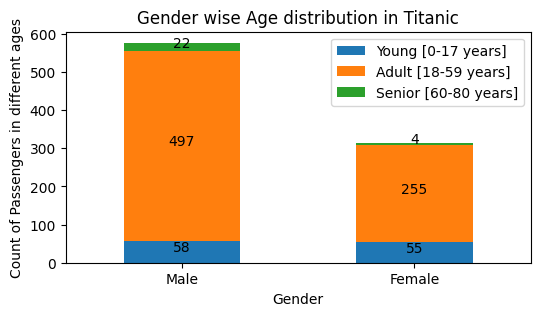

In [17]:
young = tdf[tdf['Age']<18]['Sex'].value_counts()
adult = tdf[(tdf['Age']>=18) & (tdf['Age']<=59)]['Sex'].value_counts()
senior = tdf[tdf['Age']>59]['Sex'].value_counts()
ageDf = pd.DataFrame({'Young [0-17 years]': young.values, 'Adult [18-59 years]': adult.values, 
                      'Senior [60-80 years]': senior.values},
                       index=['Male','Female'])
ageRangeAx = ageDf.plot.bar(stacked=True,rot=0, figsize=(6,3))
ageRangeAx.set_title("Gender wise Age distribution in Titanic")
ageRangeAx.set_xlabel("Gender")
ageRangeAx.set_ylabel("Count of Passengers in different ages")
for p in ageRangeAx.patches:
    h = p.get_height()
    w = p.get_width()
    x = p.get_x()
    y = p.get_y()
    ageRangeAx.annotate(str(round(h)),xy=(x+w/2,y+h/2),ha='center')

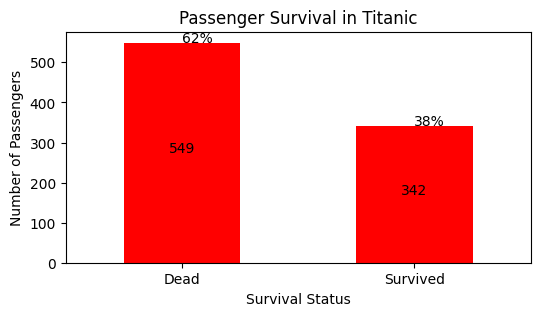

In [18]:
#3. Survived Column chart
survived = tdf['Survived'].value_counts()
survived.values
total = survived.sum()
df = pd.DataFrame({'Survived':survived.values},index=['Dead','Survived'])
ax = df.plot.bar(y='Survived',rot=0, color="red", figsize=(6,3),legend=False)
ax.set_title("Passenger Survival in Titanic")
ax.set_xlabel("Survival Status")
ax.set_ylabel("Number of Passengers")
for p in ax.patches:
    h = p.get_height()
    w = p.get_width()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(str(round((h*100)/total)) + "%",xy=(x + w/2,h))
    ax.annotate(str(h),xy=(x+w/2,y+h/2),ha='center')

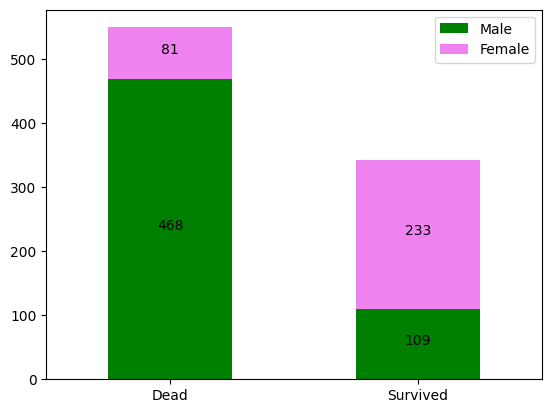

In [19]:
#4. Survived and Dead passengers with how many females or males
data = tdf[['Sex','Survived']].value_counts().sort_index()
male = data['male'].values
female = data['female'].values
df = pd.DataFrame({'Male': male, 'Female': female},index=['Dead','Survived'])
ax = df.plot.bar(stacked=True,rot=0, color={'Male':'green', 'Female': 'violet'})
for p in ax.patches:
    h = p.get_height()
    w = p.get_width()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(str(round(h)),xy=(x+w/2,y+h/2),ha='center')

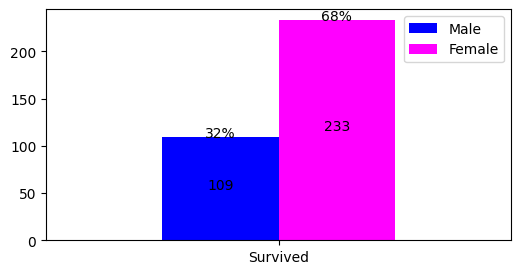

In [20]:
#5. Survived column with how many females or males survived
data = tdf.loc[tdf['Survived'] == 1,['Sex']].value_counts()
df = pd.DataFrame({'Male': data['male'], 'Female': data['female']},index=['Survived'])
ax = df.plot.bar(rot=0, figsize=(6,3), color={'Male':'blue', 'Female':'#FF00FF'})
for p in ax.patches:
    h = p.get_height()
    w = p.get_width()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(str(round(h)),xy=(x+w/2,y+h/2),ha='center')
    ax.annotate(str(round((h*100)/data.sum())) + "%",xy=(x+w/2,h),ha='center')

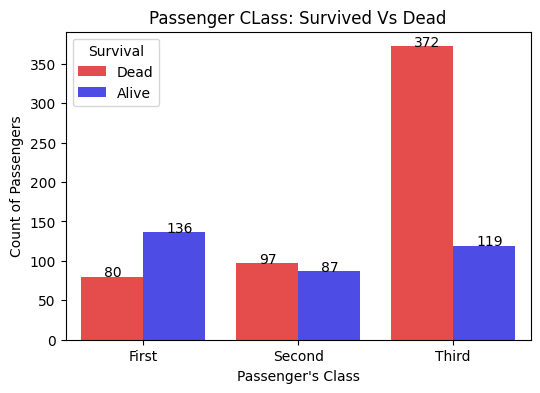

In [21]:
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.countplot(x='Pclass',hue='Survived',data=tdf,palette=['red','blue'], alpha=0.8)
ax.set(
   title='Passenger CLass: Survived Vs Dead',
   xlabel='Passenger\'s Class',
   ylabel='Count of Passengers',
   xticklabels = ['First','Second','Third']
)
ax.legend(title='Survival', labels=['Dead','Alive'])
for p in ax.patches:
    h = p.get_height()
    x = p.get_x()
    w = p.get_width()
    ax.annotate(h, (x+0.15, h))
plt.show()

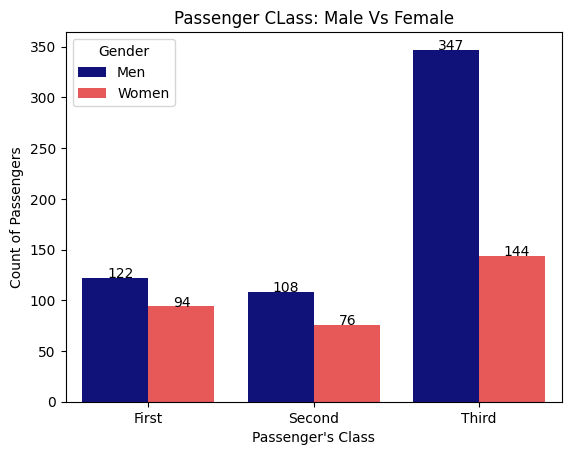

In [55]:
pAx = sns.countplot(x='Pclass',hue='Sex',data=tdf,palette=['#00008B','#FF4040'])
pAx.set(
   title='Passenger CLass: Male Vs Female',
   xlabel='Passenger\'s Class',
   ylabel='Count of Passengers',
   xticklabels = ['First','Second','Third']
)
pAx.legend(title='Gender', labels=['Men','Women'])
for p in pAx.patches:
    h = p.get_height()
    x = p.get_x()
    w = p.get_width()
    pAx.annotate(h, (x+0.15, h))
plt.show()

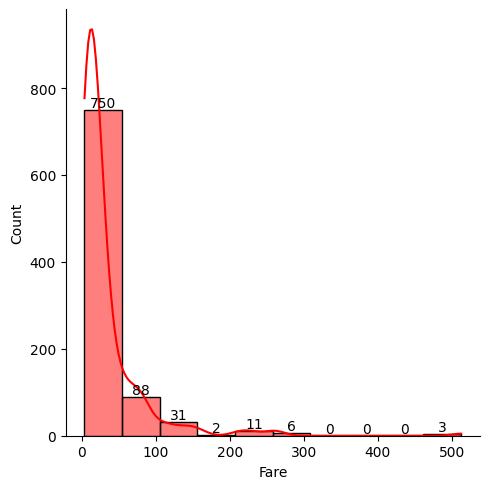

In [58]:
fareAx = sns.displot(tdf['Fare'],kde=True,bins=10,color='red')
#kde kernal density estimation
fareFacet = fareAx.facet_axis(0,0)
for e in fareFacet.containers:
    fares = [v.get_height() for v in e]
    #females = [v.get_x() for v in e]
    fareFacet.bar_label(e, labels=fares, label_type='edge')

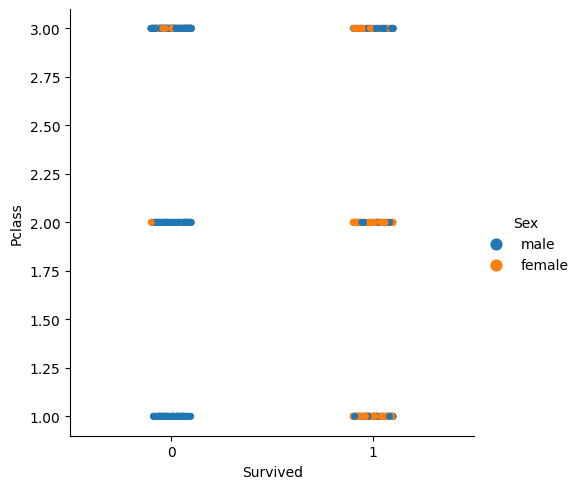

In [23]:
#sb.factorplot(x='Pclass',y='Survived',hue='Sex',data=df1)
sns.catplot(x='Survived',y='Pclass',hue='Sex',data=tdf, kind='strip')
plt.show()

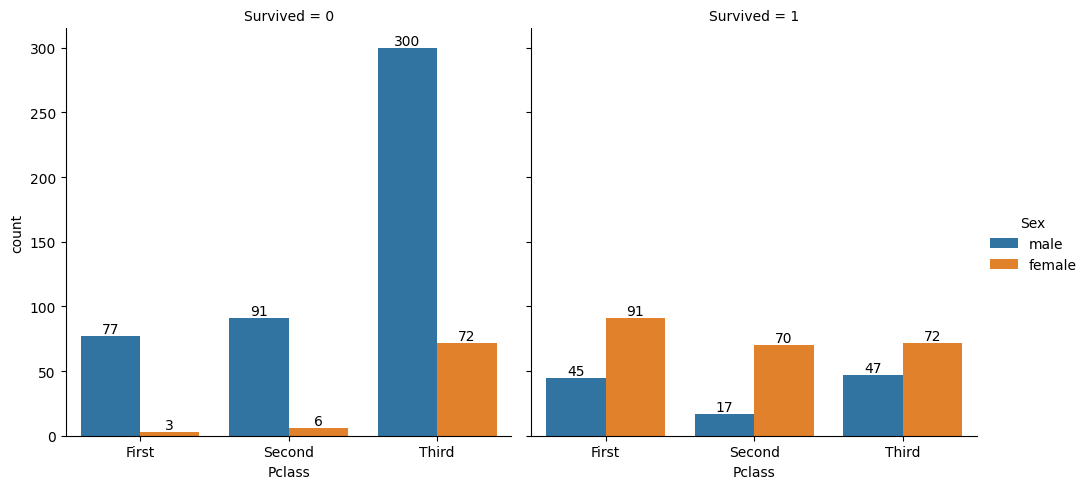

In [27]:
catAx = sns.catplot(x='Pclass',hue='Sex',col='Survived',data=tdf,kind='count')
catAx.set(
#    title='Passenger CLass: Survived Vs Not --> Male Vs Female',
#    xlabel='Passenger\'s Class',
#    ylabel='Count of Passengers',
    xticklabels = ['First','Second','Third']
 )
survived_0 = catAx.facet_axis(0,0)
for e in survived_0.containers:
    males = [v.get_height() for v in e]
    females = [v.get_x() for v in e]
    survived_0.bar_label(e, labels=males, label_type='edge')
survived_1 = catAx.facet_axis(0,1)
for e in survived_1.containers:
    males = [v.get_height() for v in e]
    females = [v.get_x() for v in e]
    survived_1.bar_label(e, labels=males, label_type='edge')
plt.show()

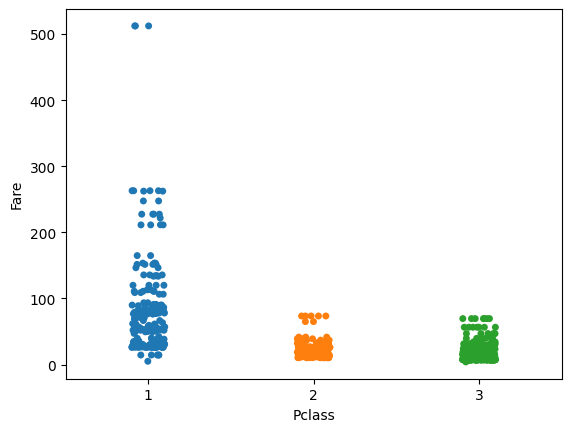

In [28]:
ax = sns.stripplot(x=tdf['Pclass'],y=tdf['Fare'])
plt.show()
# first = tdf[(tdf['Pclass']== 3)]
# first.sort_values(by=['Fare'])

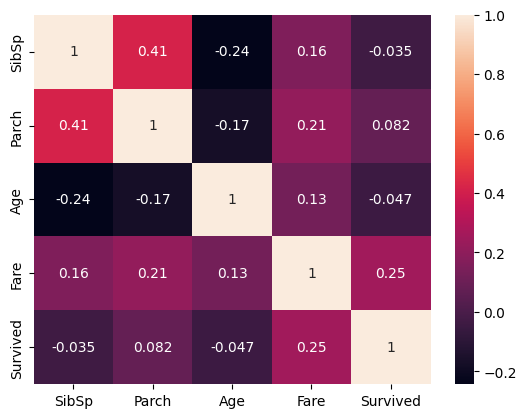

In [37]:
#Correlation between Sibsp--Parch--Age--Fare--Survived
l = ['SibSp','Parch','Age','Fare','Survived']
sns.heatmap(tdf[l].corr(),annot = True)
plt.show()

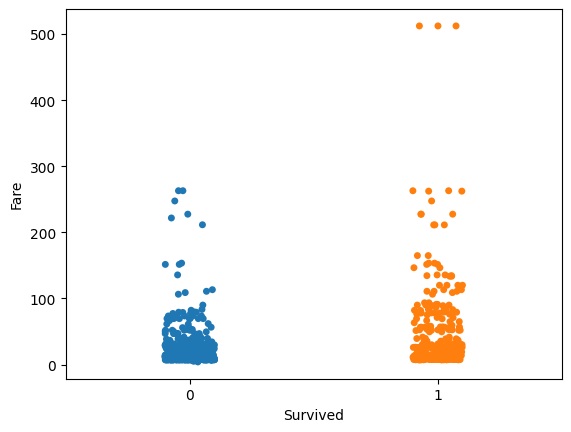

In [43]:
sns.stripplot(x=tdf['Survived'],y=tdf['Fare'])
plt.show()

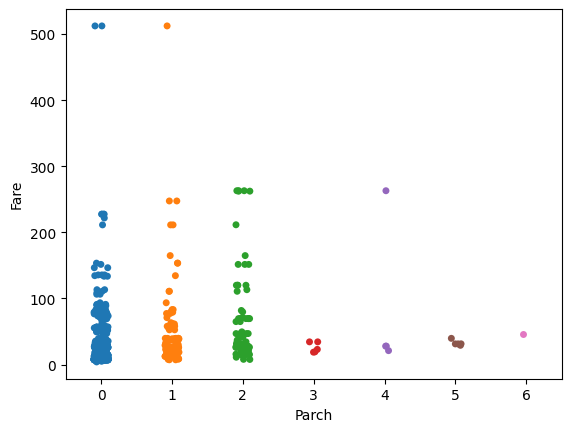

In [53]:
sns.stripplot(x=tdf['Parch'],y=tdf['Fare'])
plt.show()

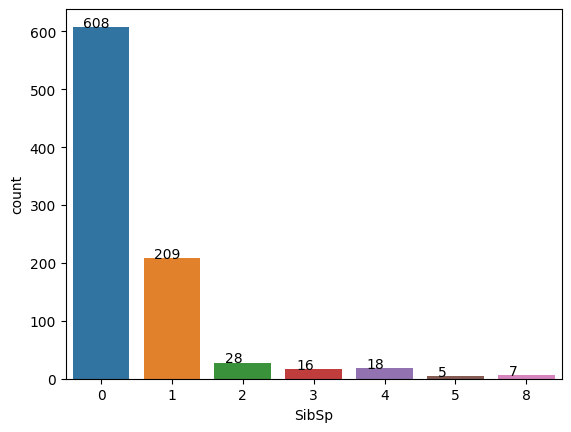

In [67]:
sibSpAx = sns.countplot(x='SibSp',data=tdf)
for p in sibSpAx.patches:
    h = p.get_height()
    x = p.get_x()
    w = p.get_width()
    sibSpAx.annotate(h, (x+0.15, h))
plt.show()
#SibSp count 